<a href="https://colab.research.google.com/github/shubhamk2001/Deep-Learning-Basics/blob/main/Simple_AutoEncoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

encoding_dim = 32

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu',activity_regularizer=regularizers.l1(1e-5))(input_img)
# encoded.add(Dropout(0.2))
decoded = Dense(784, activation='sigmoid',activity_regularizer=regularizers.l1(1e-5))(encoded)
# decoded.add(Dropout(0.2))

In [ ]:
#this model maps the input to its reconstruction
autoencoder = Model(input_img, decoded)

In [ ]:
#this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [ ]:
# create a placeholder for an encoded (32 dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
# Finetune the model
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np
# Since autoencoder is an unsupervised learning algorithm so it does not require labels
(x_train, _), (x_test, _) = mnist.load_data()

In [ ]:
# Normalization of the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=64,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.9492 - val_loss: 0.9480
Epoch 2/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.9480 - val_loss: 0.9469
Epoch 3/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.9470 - val_loss: 0.9459
Epoch 4/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.9460 - val_loss: 0.9450
Epoch 5/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.9451 - val_loss: 0.9442
Epoch 6/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.9443 - val_loss: 0.9434
Epoch 7/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.9435 - val_loss: 0.9426
Epoch 8/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.9428 - val_loss: 0.9419
Epoch 9/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.9420 - val_loss: 0.9411
Epoch 10/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.9413 - val_loss: 0.9404
Epoch 11/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.9405 - val_loss: 0.9396
Epoch 12/100
938/938 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
# encode and decode some digits
# note that we take from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


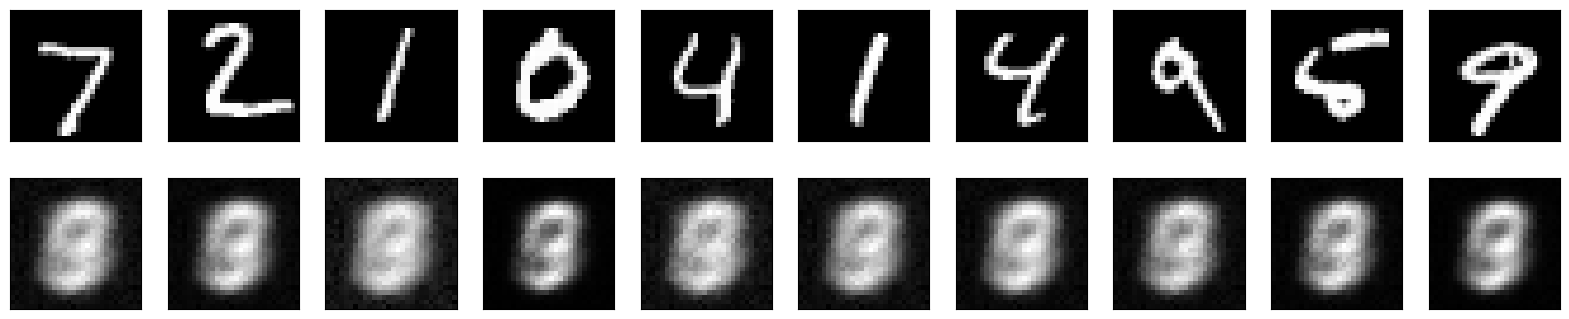

In [ ]:
# Use matplotlib
import matplotlib.pyplot as plt

n=10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()